In [ ]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List

In [ ]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()


In [ ]:
!python -m minihack.scripts.env_list


In [ ]:
def build_path(parent: dict, target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    while target is not None:
        path.append(target)
        target = parent[target]
    path.reverse()
    return path

## Breadth-First Search (BFS)¶

In [ ]:
def bfs(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    # Create a queue for BFS and mark the start node as visited
    queue = deque()
    visited = set()
    queue.append(start)
    visited.add(start)

    # Create a dictionary to keep track of the parent node for each node in the path
    parent = {start: None}

    while queue:
        # Dequeue a vertex from the queue
        current = queue.popleft()

        # Check if the target node has been reached
        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        # Visit all adjacent neighbors of the dequeued vertex
        for neighbor in get_valid_moves(game_map, current):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    print("Target node not found!")
    return None

In [ ]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
path

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
actions

In [ ]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [ ]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

## A* Search Algorithm

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
def a_star(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = PriorityQueue()
    close_list = []
    # additional dict which maintains the nodes in the open list for an easier access and check
    support_list = {}

    starting_state_g = 0
    starting_state_h = h(start, target)
    starting_state_f = starting_state_g + starting_state_h

    open_list.put((starting_state_f, (start, starting_state_g)))
    support_list[start] = starting_state_g
    parent = {start: None}

    while not open_list.empty():
        # get the node with lowest f
        _, (current, current_cost) = open_list.get()
        # add the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue
            # compute neighbor g, h and f values
            neighbor_g = 1 + current_cost
            neighbor_h = h(neighbor, target)
            neighbor_f = neighbor_g + neighbor_h
            parent[neighbor] = current
            neighbor_entry = (neighbor_f, (neighbor, neighbor_g))
            # if neighbor in open_list
            if neighbor in support_list.keys():
                # if neighbor_g is greater or equal to the one in the open list, continue
                if neighbor_g >= support_list[neighbor]:
                    continue
            
            # add neighbor to open list and update support_list
            open_list.put(neighbor_entry)
            support_list[neighbor] = neighbor_g

    print("Target node not found!")
    return None

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel_crop'])

In [ ]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])

## Hill Climb search



In [ ]:
def build_path_HillClimb(parent: dict, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    current = target

    while current is not None and current != start:
        path.append(current)
        current = parent[current]

    path.append(start)  # Add the starting point to the path
    path.reverse()

    return path

In [ ]:
def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = [start]
    close_list = []
    parent = {start: None}

    while open_list:
        # getting the current node
        current = open_list.pop()
        # adding the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path_HillClimb(parent, start,target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue

            # compute neighbor h value
            neighbor_h = h(neighbor, target)
            parent[neighbor] = current
            # if neighbor not in open list, adding it
            if neighbor not in open_list:
                open_list.append(neighbor)

    print("Target node not found!")
    return None

In [ ]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = hill_climb(game_map, start, target, manhattan_distance)

In [ ]:
path

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])

# Genetic Algorithm

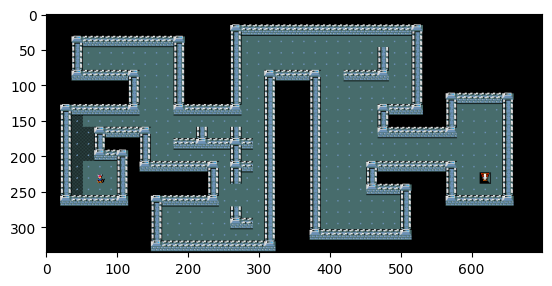

In [1]:
'''INITIALIZE ENVIRONMENT'''

import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

env_opts = {
    "id": "MiniHack-Navigation-Custom-v0",
    "des_file": "complex_maze.des",
    "observation_keys": ("chars", "pixel"),
}
env = gym.make(
    env_opts["id"],
    observation_keys=env_opts["observation_keys"],
    des_file = env_opts["des_file"],
)
state = env.reset()
game = state['pixel']
image = plt.imshow(game[0:700, 300:1000])  #for complex maze
#image = plt.imshow(game[75:300, 450:800])   #for simple maze

In [2]:
'''LOAD ENVIRONMENT VARIABLES'''

load_dotenv(".env", override=True)

epochs = int(os.getenv('epochs'))
n_genes = int(os.getenv('n_genes'))
path_length = int(os.getenv('path_length'))
substring_length = int(os.getenv('substring_length'))
shuffle_size = int(os.getenv('shuffle_size'))

print(epochs)
print(n_genes)
print(path_length)
print(substring_length)
print(shuffle_size)

f = open("logs.txt", "w")
f.write(f"REMEMBER: fitness function gains distance from target and distance from initial position\n")
f.close()

100
15
95
23
35


In [3]:
'''CREATE "n_processes" POPULATIONS, EACH WITH "n_genes" PATHS'''

from multiprocessing import Process, Queue
from ga import ga

q = Queue()
n_processes = 8
processes = []

for i in range(n_processes):
    p = Process(target=ga, args=(env_opts, n_genes, path_length, epochs, substring_length, shuffle_size, q))
    p.start()
    processes.append(p)
for p in processes:
    p.join()

100%|██████████| 5/5 [30:17<00:00, 363.46s/it]


In [4]:
paths = []
while q.empty() == False:
    paths.append(q.get())
len(paths)

128

In [5]:
len(paths[i])

95

In [6]:
'''EXTRACT THE BEST PATH FROM ALL POPULATIONS'''
from ga import heuristic2
best_path = []
min_target_distance = 0
    
for path in paths:
    state = env.reset()
    game_map = state['chars']
    game = state['pixel']
    h = heuristic2(env, path)
    print(h)
    if h > min_target_distance:
        best_path = path
        min_target_distance = h
print(min_target_distance)
print(best_path)

68.75
100.0090909090909
68.75
110.0
100.0090909090909
78.57857142857144
110.0
100.0090909090909
220.0
183.31666666666666
100.0090909090909
73.31666666666668
366.68333333333334
100.0090909090909
100.0090909090909
366.68333333333334
1100.0
366.68333333333334
550.0
550.0
550.0
1100.0
10001
1100.0
1100.0
366.68333333333334
10001
550.0
550.0
550.0
10001
366.68333333333334
183.31666666666666
366.68333333333334
366.68333333333334
10001
10001
10001
10001
10001
275.0
10001
10001
10001
275.0
550.0
10001
10001
550.0
550.0
10001
1100.0
10001
550.0
10001
550.0
550.0
1100.0
10001
1100.0
10001
550.0
10001
10001
61.105555555555554
73.31666666666668
68.75
73.31666666666668
68.75
78.57857142857144
73.31666666666668
73.31666666666668
78.57857142857144
78.57857142857144
61.105555555555554
64.7235294117647
57.88157894736842
68.75
64.7235294117647
84.62307692307694
4.35
4.1499999999999995
4.1499999999999995
4.35
4.1499999999999995
4.35
4.0
4.0
4.35
4.35
4.55
4.0
4.1499999999999995
4.1499999999999995
4.14999

In [ ]:
len(best_path)

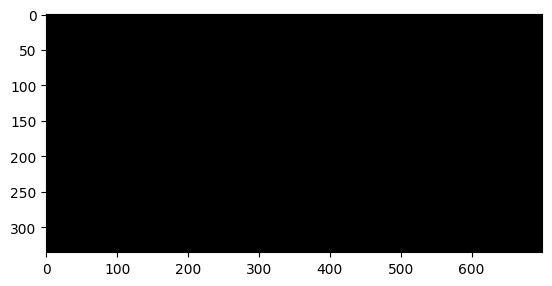

In [9]:
def display_game(image, path):
    try:
        for move in path:
            s, _, _, _ = env.step(move)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            image.set_data(s['pixel'][0:700, 300:1000])
    except:
        return
    
path = best_path
state = env.reset()
game_map = state['chars']
game = state['pixel']
image = plt.imshow(game[0:700, 300:1000])
points = display_game(image, path)